In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# parser and IQR computer import
%cd 'drive/My Drive/BoniLabMDR'
from plot_helper import IQR_compute

/content/drive/My Drive/BoniLabMDR


MFT - Compute IQR

In [3]:
# change to targeted folder of datasets
%cd './data/MFT/1-Monthly Data'
# parse output files and computer IQR
(MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf) = IQR_compute(filepattern='monthly_mft_%s.txt')

/content/drive/My Drive/BoniLabMDR/data/MFT/1-Monthly Data


Cycling - Compute IQR

In [4]:
# change to targeted folder of datasets
%cd '../../Cycling/1-Monthly Data'
# parse output files and computer IQR
(Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf) = IQR_compute(filepattern='monthly_cyc_%s.txt')

/content/drive/My Drive/BoniLabMDR/data/Cycling/1-Monthly Data


Adaptive Cycling - Compute IQR

In [5]:
# change to targeted folder of datasets
%cd '../../Adaptive Cycling/1-Monthly Data'
# parse output files and computer IQR
(AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf) = IQR_compute(filepattern='monthly_adpcyc_%s.txt')

/content/drive/My Drive/BoniLabMDR/data/Adaptive Cycling/1-Monthly Data


Start assembling results:

In [6]:
%cd '../../..'

/content/drive/My Drive/BoniLabMDR


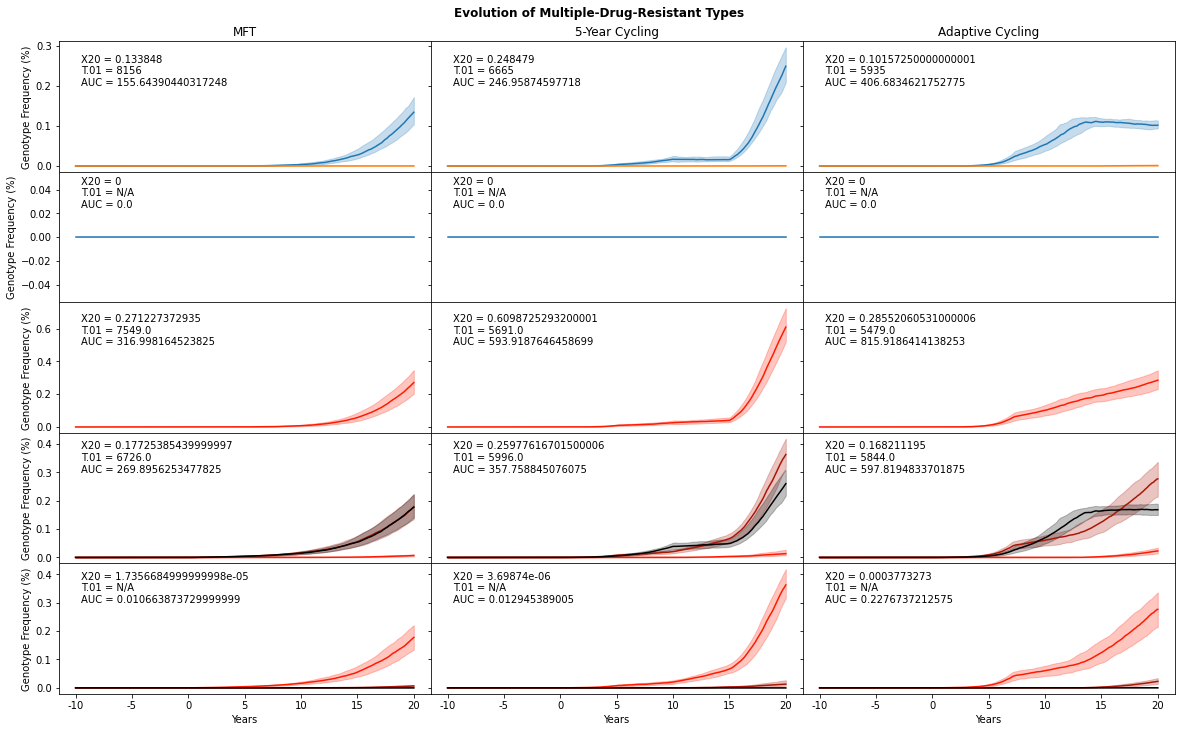

In [8]:
# prepare plt for 5x3 subpanels
import matplotlib.pyplot as plt
from plot_helper import xaxis_label_ticker
import matplotlib.ticker as ticker
xlocator = 5*365
ticks_x = xaxis_label_ticker()

fig, axs = plt.subplots(5, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
fig.suptitle('Evolution of Multiple-Drug-Resistant Types', y=0.92, fontweight='bold')
plt.rcParams['figure.figsize'] = [20, 12]
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), \
      (ax10, ax11, ax12), (ax13, ax14, ax15) = axs

# plot trends for most-dangerous-triple (2 types)
from plotter import geno_trend_plot_most_dange_trip, \
                    geno_trend_plot_double_higher

#  MFT
geno_trend_plot_most_dange_trip(ax1, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, ['TYY--Y2.','TYYYYY2.'], 0.2)
geno_trend_plot_most_dange_trip(ax4, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, ['KNFNFY2.'], 0.025)
geno_trend_plot_double_higher(ax7, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'DHA-PPQ', 0.5)
geno_trend_plot_double_higher(ax10, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'AS-AQ', 0.3)
geno_trend_plot_double_higher(ax13, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'AL', 0.3)

#  Cycling
geno_trend_plot_most_dange_trip(ax2, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, ['TYY--Y2.','TYYYYY2.'], 0.2)
geno_trend_plot_most_dange_trip(ax5, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, ['KNFNFY2.'], 0.025)
geno_trend_plot_double_higher(ax8, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'DHA-PPQ', 0.5)
geno_trend_plot_double_higher(ax11, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'AS-AQ', 0.3)
geno_trend_plot_double_higher(ax14, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'AL', 0.3)

#  Adaptive Cycling
geno_trend_plot_most_dange_trip(ax3, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, ['TYY--Y2.','TYYYYY2.'], 0.2)
geno_trend_plot_most_dange_trip(ax6, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, ['KNFNFY2.'], 0.025)
geno_trend_plot_double_higher(ax9, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'DHA-PPQ', 0.5)
geno_trend_plot_double_higher(ax12, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'AS-AQ', 0.3)
geno_trend_plot_double_higher(ax15, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'AL', 0.3)

# Labeling Strategies
ax1.set_title('MFT')
ax2.set_title('5-Year Cycling')
ax3.set_title('Adaptive Cycling')

ax13.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax13.xaxis.set_major_formatter(ticks_x)
ax14.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax14.xaxis.set_major_formatter(ticks_x)
ax15.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax15.xaxis.set_major_formatter(ticks_x)

ax13.set_xlabel('Years')
ax14.set_xlabel('Years')
ax15.set_xlabel('Years')
ax1.set_ylabel('Genotype Frequency (%)')
ax4.set_ylabel('Genotype Frequency (%)')
ax7.set_ylabel('Genotype Frequency (%)')
ax10.set_ylabel('Genotype Frequency (%)')
ax13.set_ylabel('Genotype Frequency (%)')

plt.show()